In [1]:
# Imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from env import user,password,host

In [2]:
def get_zillow(user=user,password=password,host=host):
    """
    This function retrieves data from a MySQL database containing information about single family
    residential properties and saves it to a CSV file or returns it as a pandas dataframe.
    
    :param user: The username for the MySQL database connection
    :param password: The password is unique per person pulled from personal env
    :param host: The host parameter is the address of the server where the MySQL database is hosted
    :return: a pandas DataFrame containing information about single family residential properties in
    2017 from the Zillow database. If the data has already been saved to a CSV file, the function reads
    the data from the file. Otherwise, it reads the data from the database, saves it to a CSV file, and
    returns the DataFrame.
    """
    # name of cached csv
    filename = 'zillow.csv'
    # wrangle from cached data
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    # wrangle from sql db if not cached
    else:
        # read sql query into df
        # 261 is single family residential id
        df = pd.read_sql('''select bedroomcnt
                                    , bathroomcnt
                                    , calculatedfinishedsquarefeet
                                    , taxvaluedollarcnt
                                    , yearbuilt
                                    , taxamount
                                    , fips 
                            from properties_2017
                            where propertylandusetypeid = 261'''
                            , f'mysql+pymysql://{user}:{password}@{host}/zillow')
        # cache data locally
        df.to_csv(filename, index=False)
        return df

In [3]:
# get initial data
df = get_zillow()

In [4]:
# check size
df.shape

(2140235, 7)

In [5]:
# look at value ranges
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yearbuilt,2140235.0,1960.967545,22.150563,1801.00,1949.00,1958.00,1976.00,2016.00
bedroomcnt,2140235.0,3.301419,0.932600,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2140235.0,2.240352,0.990549,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2140235.0,1863.193970,1221.754161,1.00,1258.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2140235.0,460641.625164,677157.635675,22.00,189166.00,328296.00,534606.00,90188462.00
taxamount,2140235.0,5616.711322,7814.562798,6.34,2540.85,4111.47,6411.93,1078101.87
fips,2140235.0,6048.309556,20.344910,6037.00,6037.00,6037.00,6059.00,6111.00


In [6]:
# look at dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140235 entries, 0 to 2140234
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   yearbuilt                     float64
 1   bedroomcnt                    float64
 2   bathroomcnt                   float64
 3   calculatedfinishedsquarefeet  float64
 4   taxvaluedollarcnt             float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 114.3 MB


In [7]:
# check and count nulls
df.isnull().sum()

yearbuilt                       0
bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
taxamount                       0
fips                            0
dtype: int64

In [8]:
# what if we drop, what is the size
df1 = df.dropna()
df1.shape

(2140235, 7)

In [9]:
# how much does it account for
df1.shape[0] / df.shape[0]

1.0

In [10]:
# less than 1% so dropping
df = df.dropna()

In [11]:
import wrangle

In [12]:
df2 = wrangle.wrangle_zillow()
df2

,year,beds,baths,sqft,total_tax,recent_tax,county
0,2005,4,2.0,3633,296425,6941.39,LA
1,2011,3,4.0,1620,847770,10244.94,LA
2,1926,3,2.0,2077,646760,7924.68,LA
3,1972,0,0.0,1200,5328,91.60,LA
4,1973,0,0.0,171,6920,255.17,LA
...,...,...,...,...,...,...,...
2140230,2015,4,4.0,4375,422400,13877.56,LA
2140231,2015,4,3.0,2262,960756,13494.52,Orange
2140232,2014,4,4.5,3127,536061,6244.16,Orange
2140233,2015,3,2.5,1974,424353,5302.70,Orange


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140235 entries, 0 to 2140234
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   year        int64  
 1   beds        int64  
 2   baths       float64
 3   sqft        int64  
 4   total_tax   int64  
 5   recent_tax  float64
 6   county      object 
dtypes: float64(2), int64(4), object(1)
memory usage: 114.3+ MB


In [14]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2140235.0,1960.967545,22.150563,1801.00,1949.00,1958.00,1976.00,2016.00
beds,2140235.0,3.301419,0.932600,0.00,3.00,3.00,4.00,25.00
baths,2140235.0,2.240352,0.990549,0.00,2.00,2.00,3.00,32.00
sqft,2140235.0,1863.193970,1221.754161,1.00,1258.00,1623.00,2208.00,952576.00
total_tax,2140235.0,460641.625164,677157.635675,22.00,189166.00,328296.00,534606.00,90188462.00
recent_tax,2140235.0,5616.711322,7814.562798,6.34,2540.85,4111.47,6411.93,1078101.87


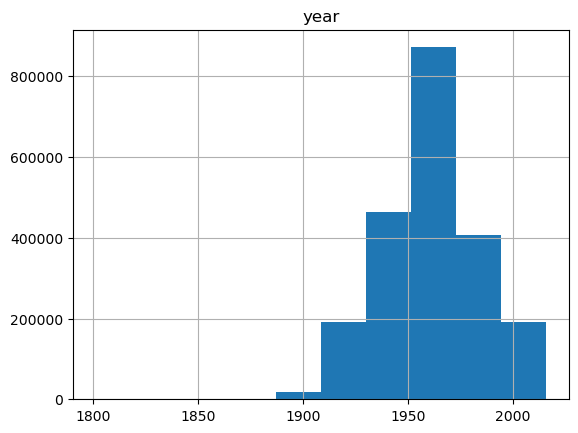

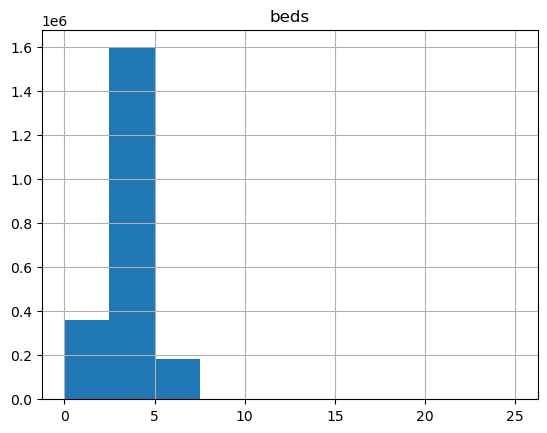

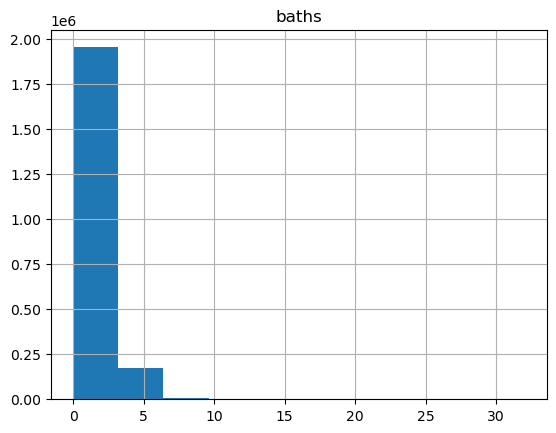

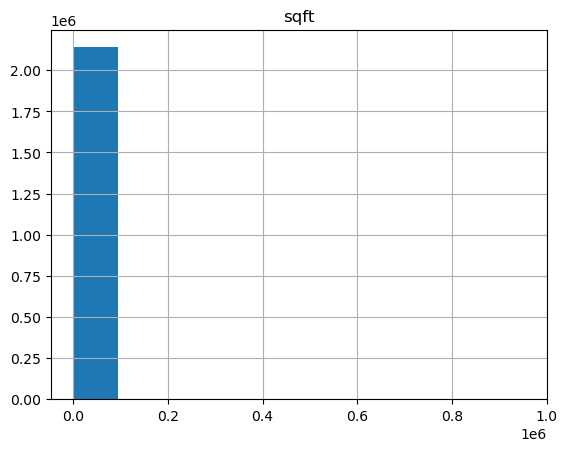

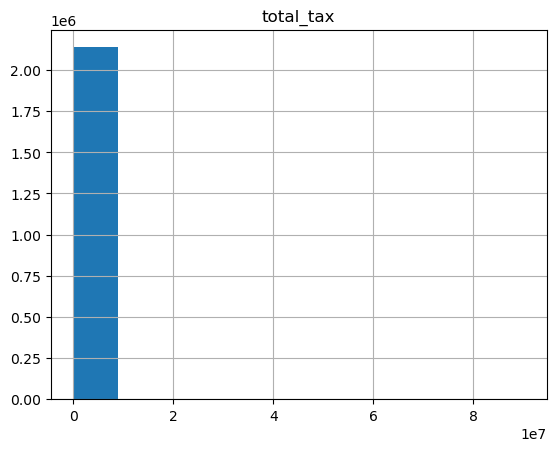

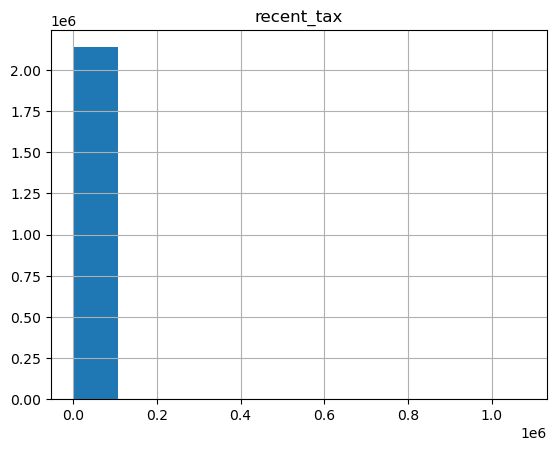

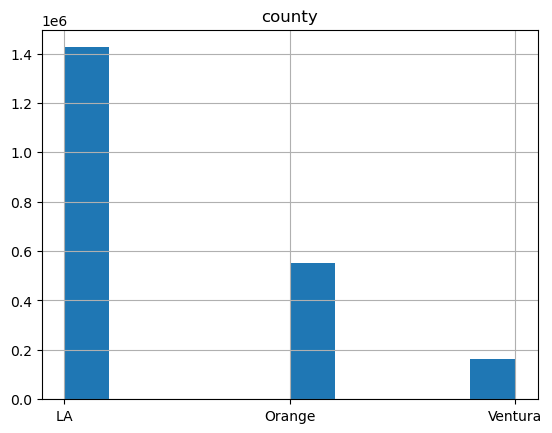

In [15]:
# List of columns
cols = ['year', 'beds', 'baths', 'sqft','total_tax','recent_tax','county']

for col in cols:
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    df2[col].hist()
    plt.show()

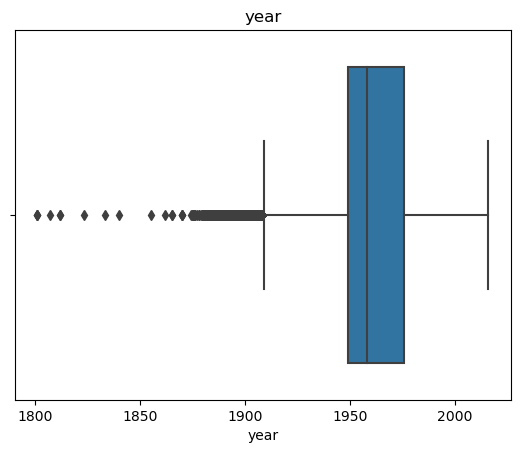

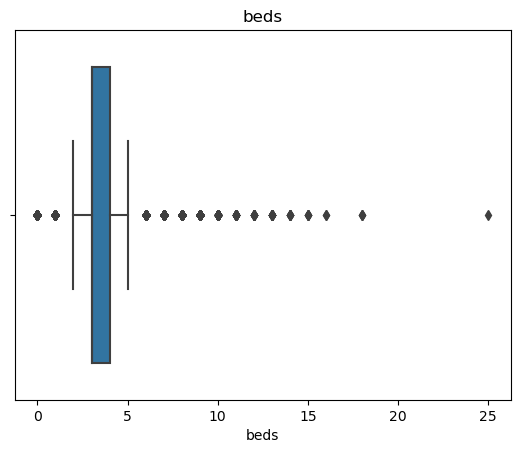

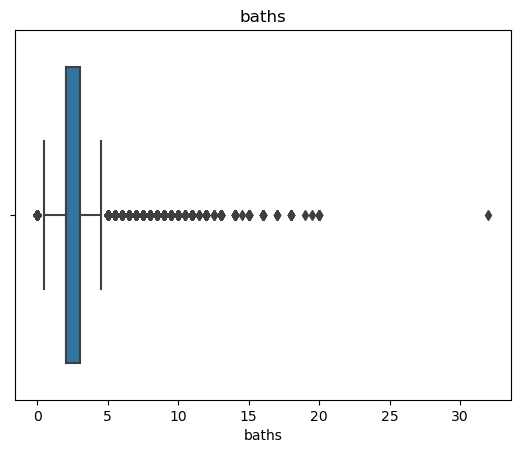

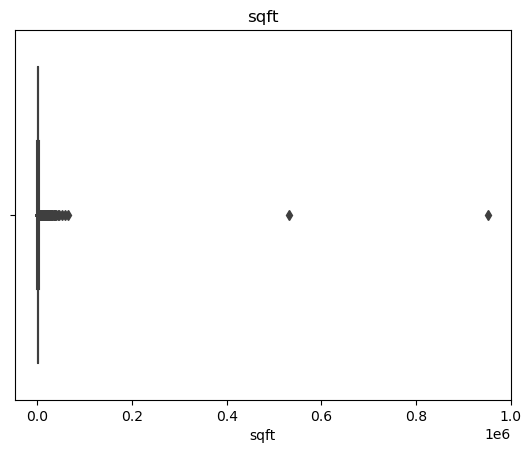

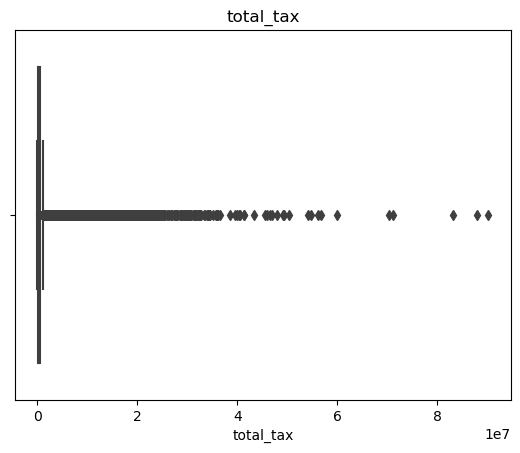

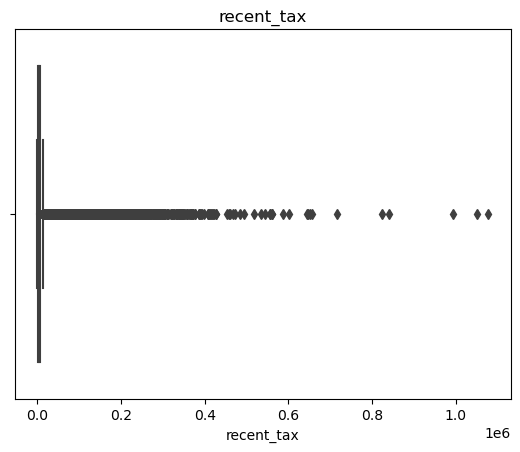

In [16]:
cols = ['year', 'beds', 'baths', 'sqft','total_tax','recent_tax']

for col in cols:
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    sns.boxplot(data=df2, x=col)
    plt.show()

In [17]:
df2.sqft.value_counts(bins=100)

(-951.576, 9526.75]      2138184
(9526.75, 19052.5]          1937
(19052.5, 28578.25]           88
(28578.25, 38104.0]           18
(38104.0, 47629.75]            3
                          ...   
(342928.0, 352453.75]          0
(333402.25, 342928.0]          0
(323876.5, 333402.25]          0
(314350.75, 323876.5]          0
(476288.5, 485814.25]          0
Name: sqft, Length: 100, dtype: int64